In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Dateset.csv")

In [27]:
df.head()

,Anonymous Customer ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Churn,Customer Value
0,1.0,8.0,0.0,38.0,0.0,4370.0,71.0,5.0,17.0,3.0,1.0,1.0,0.0,132.60
1,2.0,0.0,0.0,39.0,0.0,318.0,5.0,7.0,4.0,2.0,1.0,2.0,0.0,17.46
2,3.0,10.0,0.0,37.0,0.0,2453.0,60.0,359.0,24.0,3.0,1.0,1.0,0.0,181.29
3,4.0,10.0,0.0,38.0,0.0,4198.0,66.0,1.0,35.0,1.0,1.0,1.0,0.0,252.48
4,5.0,3.0,0.0,38.0,0.0,2393.0,58.0,2.0,33.0,1.0,1.0,1.0,0.0,144.78


In [28]:
df=df.drop(["Anonymous Customer ID"],axis=1)

In [29]:
df.tail()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Churn,Customer Value
3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.shape

(3157, 13)

In [31]:
df.isnull().sum()

Call  Failure              7
Complains                  7
Subscription  Length       7
Charge  Amount             7
Seconds of Use             7
Frequency of use           7
Frequency of SMS           7
Distinct Called Numbers    7
Age Group                  7
Tariff Plan                7
Status                     7
Churn                      7
Customer Value             7
dtype: int64

In [32]:
df=df.dropna()

In [33]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Churn                      0
Customer Value             0
dtype: int64

In [34]:
df.tail()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Churn,Customer Value
3145,21.0,0.0,19.0,2.0,6697.0,147.0,92.0,44.0,2.0,2.0,1.0,0.0,342.765
3146,17.0,0.0,17.0,1.0,9237.0,177.0,80.0,42.0,5.0,1.0,1.0,0.0,50.185
3147,13.0,0.0,18.0,4.0,3157.0,51.0,38.0,21.0,3.0,1.0,1.0,0.0,106.110
3148,7.0,0.0,11.0,2.0,4695.0,46.0,222.0,12.0,3.0,1.0,1.0,0.0,207.450
3149,8.0,1.0,11.0,2.0,1792.0,25.0,7.0,9.0,3.0,1.0,1.0,1.0,55.860


In [35]:
df.shape

(3150, 13)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   float64
 1   Complains                3150 non-null   float64
 2   Subscription  Length     3150 non-null   float64
 3   Charge  Amount           3150 non-null   float64
 4   Seconds of Use           3150 non-null   float64
 5   Frequency of use         3150 non-null   float64
 6   Frequency of SMS         3150 non-null   float64
 7   Distinct Called Numbers  3150 non-null   float64
 8   Age Group                3150 non-null   float64
 9   Tariff Plan              3150 non-null   float64
 10  Status                   3150 non-null   float64
 11  Churn                    3150 non-null   float64
 12  Customer Value           3150 non-null   float64
dtypes: float64(13)
memory usage: 344.5 KB


In [37]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=(0.3),random_state=2)
x_train.shape

(2205, 12)

In [39]:
x_test.shape

(945, 12)

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_x_sc=sc.fit_transform(x_train)
test_x_sc=sc.fit_transform(x_test)
pd.DataFrame(train_x_sc).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03
mean,-4.672503e-17,-3.302976e-17,1.079509e-16,4.833624e-18,-7.411557e-17,3.061295e-17,3.544658e-17,6.444832e-18,-1.611208e-17,1.232574e-16,-4.833624e-18,4.833624e-17
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.068939e+00,-2.853287e-01,-3.497752e+00,-6.303747e-01,-1.079285e+00,-1.227105e+00,-6.492774e-01,-1.388651e+00,-2.056520e+00,-2.945204e-01,-5.632089e-01,-1.005977e+00
25%,-9.328056e-01,-2.853287e-01,-3.157181e-01,-6.303747e-01,-7.348926e-01,-7.397267e-01,-5.958418e-01,-8.074874e-01,-9.307436e-01,-2.945204e-01,-5.632089e-01,-7.215228e-01
50%,-2.521397e-01,-2.853287e-01,2.735475e-01,-6.303747e-01,-3.457029e-01,-2.523487e-01,-4.622526e-01,-1.682079e-01,1.950324e-01,-2.945204e-01,-5.632089e-01,-2.817538e-01
75%,5.646595e-01,-2.853287e-01,6.271068e-01,6.524829e-01,4.613563e-01,4.264991e-01,1.166335e-01,6.454206e-01,1.950324e-01,-2.945204e-01,-5.632089e-01,4.232727e-01
max,3.831856e+00,3.504730e+00,1.687785e+00,5.783913e+00,2.899125e+00,3.194110e+00,3.999624e+00,4.132400e+00,2.446584e+00,3.395351e+00,1.775540e+00,3.750335e+00


In [41]:
from sklearn.linear_model import Perceptron
p=Perceptron()

p.fit(train_x_sc,y_train)

train_pred=p.predict(train_x_sc)
test_pred=p.predict(test_x_sc)

In [42]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       793
         1.0       0.88      0.43      0.58       152

    accuracy                           0.90       945
   macro avg       0.89      0.71      0.76       945
weighted avg       0.90      0.90      0.88       945



In [43]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
cm = metrics.confusion_matrix(y_test,test_pred)
print(cm)

[[784   9]
 [ 86  66]]


Text(0.5, 1.0, 'Confusion Matrix Heatmap')

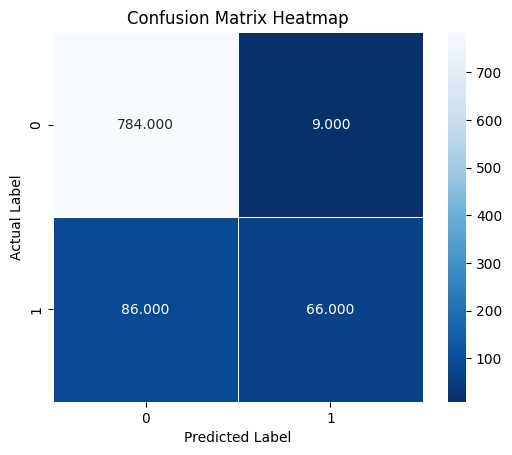

In [48]:
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.title('Confusion Matrix Heatmap')

In [49]:
from sklearn.metrics import accuracy_score
print('Training accuracy of Perceptron =',accuracy_score(y_train,train_pred))
print('Testing accuracy of Perceptron =',accuracy_score(y_test,test_pred))

Training accuracy of Perceptron = 0.8952380952380953
Testing accuracy of Perceptron = 0.8994708994708994


In [50]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
svc=SVC()
train_x_sc.shape

(2205, 12)

In [51]:
y_train.shape

(2205,)

In [52]:
y_train.shape
svc.fit(train_x_sc,y_train)

SVC()

In [53]:
train_pred_svc=svc.predict(train_x_sc)
test_pred_svc=svc.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [54]:
print("Training",accuracy_score(train_pred_svc,y_train))
print("Test",accuracy_score(test_pred_svc,y_test))

Training 0.9174603174603174
Test 0.8391534391534392


In [55]:
svc1=SVC(kernel="rbf",C=0.5)
svc1.fit(train_x_sc,y_train)
train_pred_svc1=svc1.predict(train_x_sc)
test_pred_svc1=svc1.predict(test_x_sc)

In [56]:
print("Training",accuracy_score(train_pred_svc1,y_train))
print("Test",accuracy_score(test_pred_svc1,y_test))

Training 0.9002267573696145
Test 0.9015873015873016


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x_sc,y_train)
train_pred_knn=knn.predict(train_x_sc)
test_pred_knn=knn.predict(test_x_sc)

In [58]:
print("Training accuracy:",accuracy_score(train_pred_knn,y_train))
print("testing accuracy:",accuracy_score(test_pred_knn,y_test))

Training accuracy: 0.9732426303854875
testing accuracy: 0.9396825396825397


In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_x_sc,y_train)
train_pred_dt=dt.predict(train_x_sc)
test_pred_dt=dt.predict(test_x_sc)
print("Training",accuracy_score(train_pred_dt,y_train))
print("testing",accuracy_score(test_pred_dt,y_test))
dt1=DecisionTreeClassifier(criterion='gini')
dt1.fit(train_x_sc,y_train)
train_pred_dt1=dt1.predict(train_x_sc)
test_pred_dt1=dt1.predict(test_x_sc)
print("Training",accuracy_score(train_pred_dt1,y_train))
print("testing",accuracy_score(test_pred_dt1,y_test))

Training 0.9927437641723356
testing 0.9206349206349206
Training 0.9927437641723356
testing 0.9174603174603174


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_x_sc,y_train)
train_pred_rf=rf.predict(train_x_sc)
test_pred_rf=rf.predict(test_x_sc)
print("Training",accuracy_score(train_pred_rf,y_train))
print("Testing",accuracy_score(test_pred_rf,y_test))

Training 0.9927437641723356
Testing 0.944973544973545


In [63]:
import pickle
with open("churn.pkl",'wb') as files:
  pickle.dump(rf,files)